In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import pyodbc




In [144]:
pip install pyMechkar

Note: you may need to restart the kernel to use updated packages.


In [145]:
import pyMechkar as mechkar

In [27]:
from pyMechkar import exploreData

ImportError: cannot import name 'exploreData' from 'pyMechkar' (C:\Users\dannyvaks\Documents\GitHub\DataScience\project\pyMechkar.py)

In [136]:
### In windows, Using a ODBC DNS (predefined connection name)
conn = pyodbc.connect('DSN=hair_salon_no_shown_ff;Trusted_Connection=yes;')

In [137]:
noshow = pd.read_sql("SELECT * FROM hair_salon_no_shown_ff;",conn) 
noshow.head()

,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,last_tod,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,recency,noshow
0,afternoon,Wednesday,STYLE,JJ,unknown,unknown,0,0,unknown,unknown,...,0,0,0,0,0,0,0,0,0,0
1,morning,Wednesday,COLOR,JOANNE,unknown,unknown,0,0,unknown,unknown,...,0,0,0,0,0,0,0,0,0,0
2,unknown,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262,Wednesday,morning,...,1,262,2,1,1,2,0,0,35,0
3,afternoon,Thursday,STYLE,KELLY,unknown,unknown,0,0,unknown,unknown,...,0,0,0,0,0,0,0,0,0,0
4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35,Thursday,afternoon,...,0,35,1,1,0,0,0,0,9,0


In [139]:
categoryVariableList = ["book_tod","book_dow","book_category","book_staff","last_category","last_staff","last_dow","last_tod"]
for var in categoryVariableList:
    noshow[var] = noshow[var].astype("category")

In [140]:
numericVariableList = ["last_day_services","last_receipt_tot","last_noshow","last_prod_flag","last_cumrev","last_cumbook","last_cumstyle","last_cumcolor","last_cumprod","last_cumcancel","last_cumnoshow","recency","noshow"]
for var in numericVariableList:
    noshow[var] = noshow[var].astype("float")

In [141]:
noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 21 columns):
book_tod             1952 non-null category
book_dow             1952 non-null category
book_category        1952 non-null category
book_staff           1952 non-null category
last_category        1952 non-null category
last_staff           1952 non-null category
last_day_services    1952 non-null float64
last_receipt_tot     1952 non-null float64
last_dow             1952 non-null category
last_tod             1952 non-null category
last_noshow          1952 non-null float64
last_prod_flag       1952 non-null float64
last_cumrev          1952 non-null float64
last_cumbook         1952 non-null float64
last_cumstyle        1952 non-null float64
last_cumcolor        1952 non-null float64
last_cumprod         1952 non-null float64
last_cumcancel       1952 non-null float64
last_cumnoshow       1952 non-null float64
recency              1952 non-null float64
noshow               1952

In [64]:
noshow.describe() # describe data

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,recency,noshow
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,0.545082,35.782679,0.076332,0.114242,111.258197,1.906762,1.520492,0.325307,0.487193,0.280225,0.422643,14.402152,0.114754
std,0.658514,59.371877,0.265597,0.318186,207.927702,3.315854,2.756585,0.827646,1.261275,0.853646,1.319786,21.079495,0.318807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,132.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000
max,3.000000,382.800000,1.000000,1.000000,1276.000000,20.000000,18.000000,7.000000,11.000000,8.000000,9.000000,133.000000,1.000000


In [147]:
noshow.isnull().sum() #missing cheack

book_tod             0
book_dow             0
book_category        0
book_staff           0
last_category        0
last_staff           0
last_day_services    0
last_receipt_tot     0
last_dow             0
last_tod             0
last_noshow          0
last_prod_flag       0
last_cumrev          0
last_cumbook         0
last_cumstyle        0
last_cumcolor        0
last_cumprod         0
last_cumcancel       0
last_cumnoshow       0
recency              0
noshow               0
dtype: int64

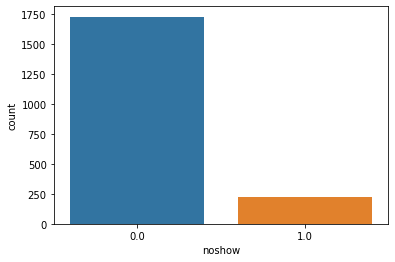

In [9]:
sns.countplot(x='noshow', data=noshow) #Distribution of the dependent variable

The data is imbalanced, there are more 0s than 1s in the dependent variable.

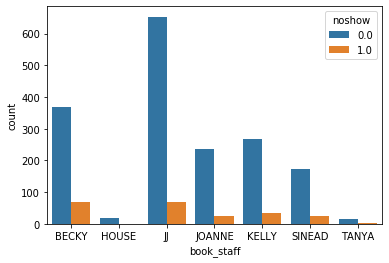

In [10]:
sns.countplot(x='book_staff', hue = "noshow", data=noshow)

According to the graph, Becky gets proportionally more no-shows than others.

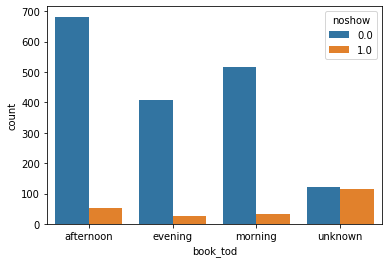

In [11]:
sns.countplot(x = "book_tod", hue = "noshow", data = noshow)

According to the graph, unknown book time of the day gets proportionally more no-shows than others.

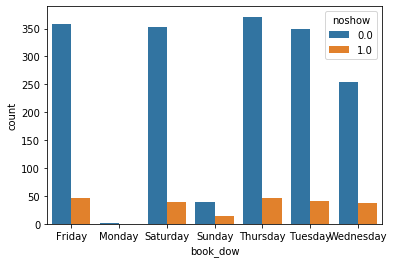

In [13]:
sns.countplot(x = "book_dow", hue = "noshow", data = noshow)

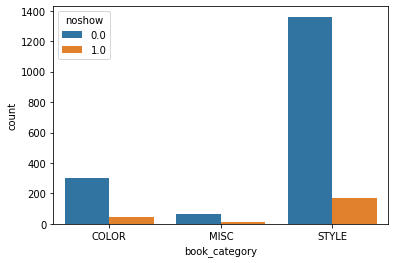

In [14]:
sns.countplot(x = "book_category", hue = "noshow", data = noshow)

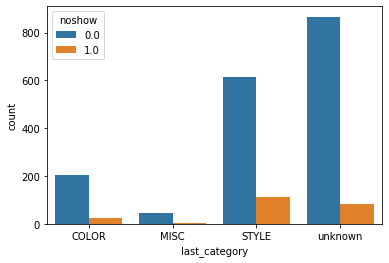

In [125]:
sns.countplot(x='last_category', hue = "noshow", data=noshow)

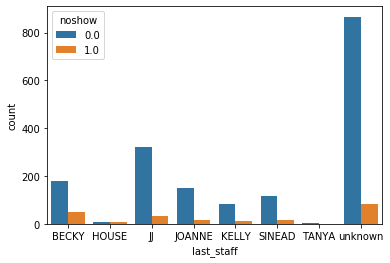

In [126]:
sns.countplot(x='last_staff', hue = "noshow", data=noshow)

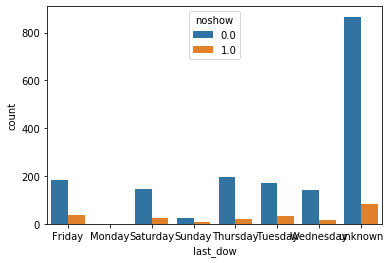

In [127]:
sns.countplot(x='last_dow', hue = "noshow", data=noshow)

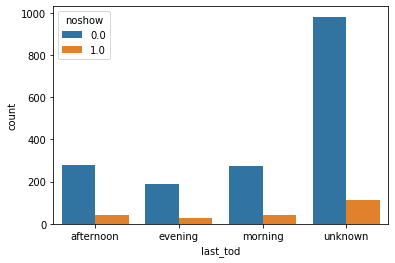

In [128]:
sns.countplot(x='last_tod', hue = "noshow", data=noshow)

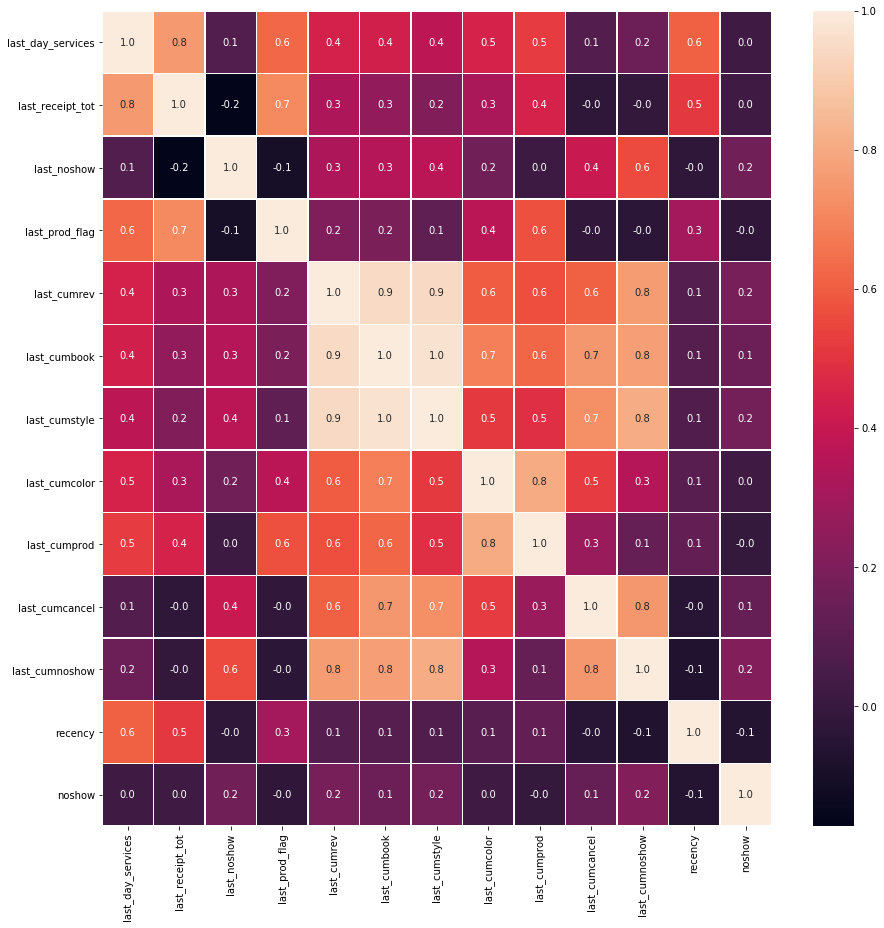

In [129]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(noshow.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

Directory  report  already exists
Directory  report  already exists


C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\pandas\core\dtypes\missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\pandas\core\dtypes\missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\pandas\core\dtypes\missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\pandas\core\dtypes\missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())
C:\U

TypeError: not all arguments converted during string formatting

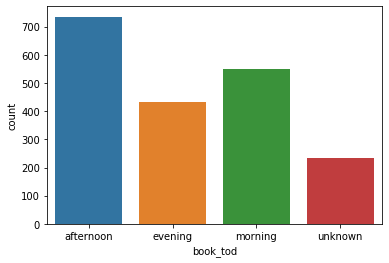

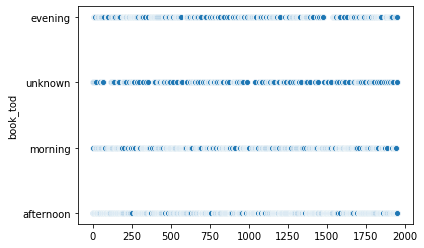

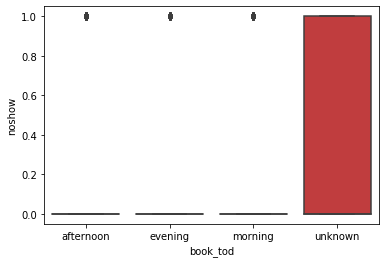

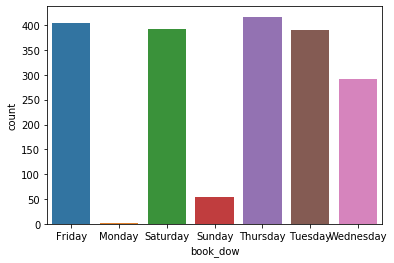

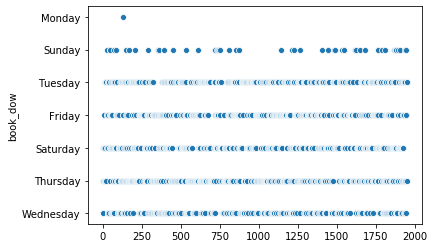

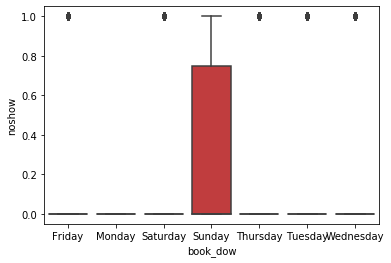

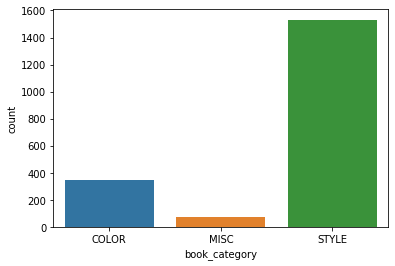

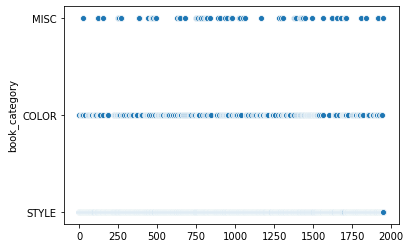

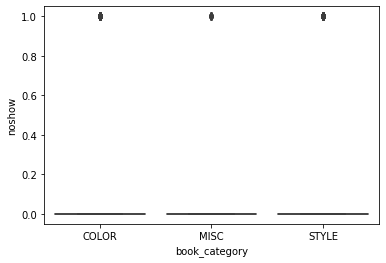

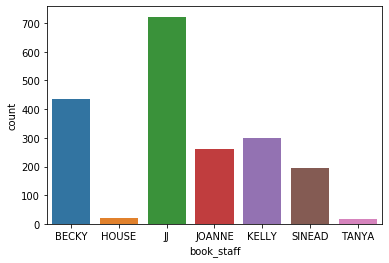

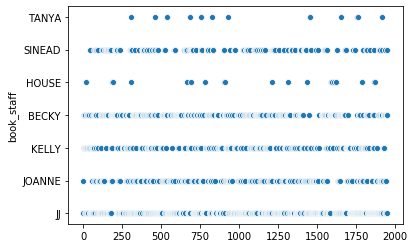

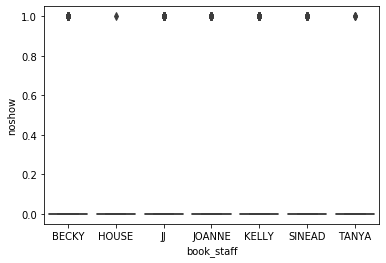

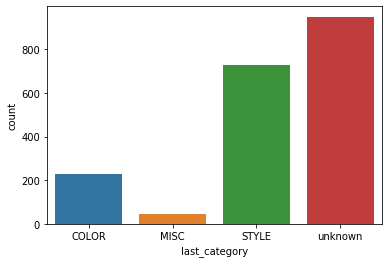

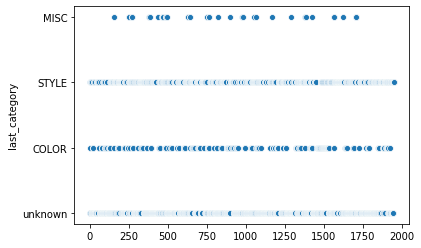

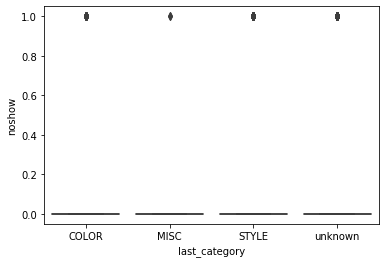

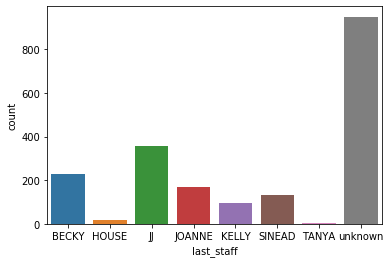

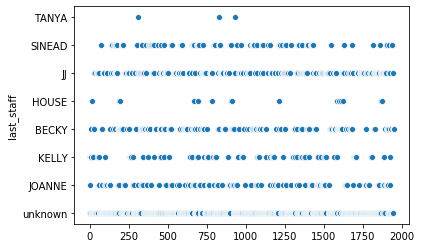

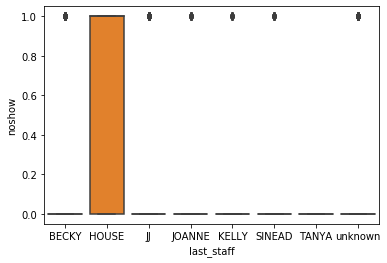

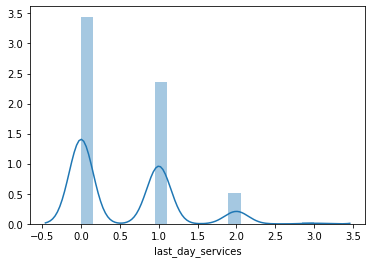

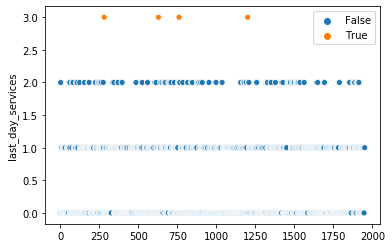

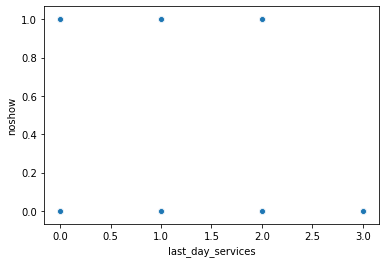

<Figure size 432x288 with 0 Axes>

In [146]:
mechkar.pyMechkar().exploreData(data=noshow,y='noshow')

In [148]:
list(set(noshow.dtypes.tolist()))

[CategoricalDtype(categories=['BECKY', 'HOUSE', 'JJ', 'JOANNE', 'KELLY', 'SINEAD',
                   'TANYA'],
                  ordered=False),
 CategoricalDtype(categories=['COLOR', 'MISC', 'STYLE', 'unknown'], ordered=False),
 CategoricalDtype(categories=['afternoon', 'evening', 'morning', 'unknown'], ordered=False),
 CategoricalDtype(categories=['COLOR', 'MISC', 'STYLE'], ordered=False),
 CategoricalDtype(categories=['BECKY', 'HOUSE', 'JJ', 'JOANNE', 'KELLY', 'SINEAD', 'TANYA',
                   'unknown'],
                  ordered=False),
 CategoricalDtype(categories=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
                   'Tuesday', 'Wednesday'],
                  ordered=False),
 dtype('float64'),
 CategoricalDtype(categories=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
                   'Tuesday', 'Wednesday', 'unknown'],
                  ordered=False)]

In [149]:
df_num = noshow.select_dtypes(include = ['float64'])
df_num.head()

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,recency,noshow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,262.0,0.0,1.0,262.0,2.0,1.0,1.0,2.0,0.0,0.0,35.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,35.0,0.0,0.0,35.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0


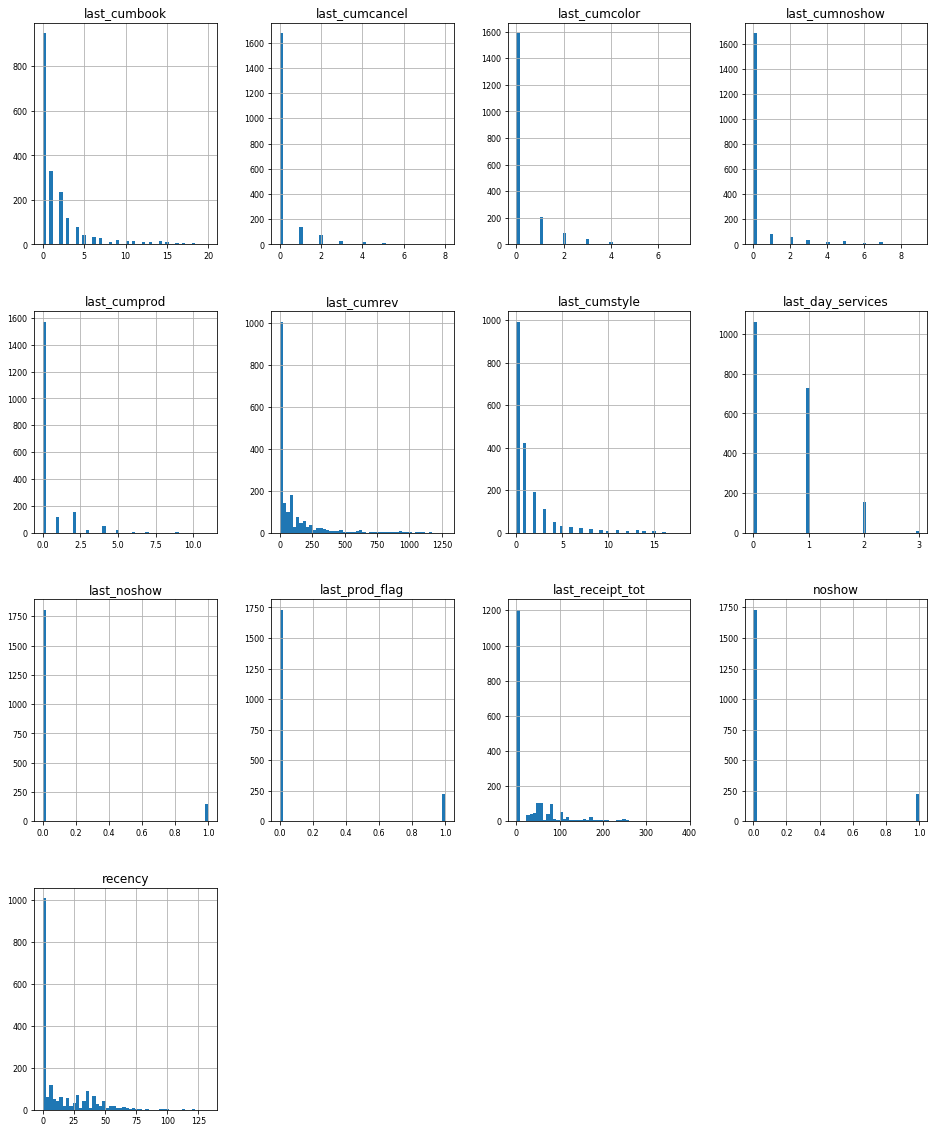

In [150]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [151]:
#convert categorical to dummies
noshowf = pd.get_dummies(noshow, columns=["book_tod","book_dow","book_category","book_staff","last_category","last_staff","last_dow","last_tod"])

In [152]:
noshowf.head()

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,...,last_dow_Saturday,last_dow_Sunday,last_dow_Thursday,last_dow_Tuesday,last_dow_Wednesday,last_dow_unknown,last_tod_afternoon,last_tod_evening,last_tod_morning,last_tod_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,2.0,262.0,0.0,1.0,262.0,2.0,1.0,1.0,2.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,1.0,35.0,0.0,0.0,35.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0


In [153]:
noshowf.drop(columns=['noshow']).assign(noshow=noshowf['noshow'])

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,...,last_dow_Sunday,last_dow_Thursday,last_dow_Tuesday,last_dow_Wednesday,last_dow_unknown,last_tod_afternoon,last_tod_evening,last_tod_morning,last_tod_unknown,noshow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0.0
2,2.0,262.0,0.0,1.0,262.0,2.0,1.0,1.0,2.0,0.0,...,0,0,0,1,0,0,0,1,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0.0
4,1.0,35.0,0.0,0.0,35.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0.0
1948,1.0,30.0,0.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0.0
1949,1.0,30.0,0.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0.0
1950,1.0,50.0,0.0,0.0,130.0,3.0,3.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0.0


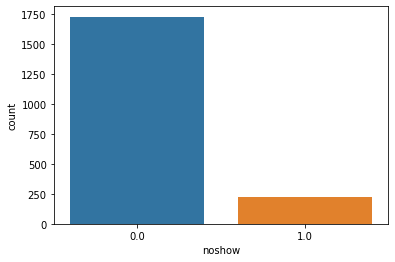

In [154]:
sns.countplot(x='noshow', data=noshowf) #Distribution of the dependent variable

In [155]:
noshowf.groupby('noshow').count()

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,...,last_dow_Saturday,last_dow_Sunday,last_dow_Thursday,last_dow_Tuesday,last_dow_Wednesday,last_dow_unknown,last_tod_afternoon,last_tod_evening,last_tod_morning,last_tod_unknown
noshow,,,,,,,,,,,,,,,,,,,,,
0.0,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,...,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
1.0,224,224,224,224,224,224,224,224,224,224,...,224,224,224,224,224,224,224,224,224,224
